# Sales Data Analysis(US)

### We are going to analyze the data and we aswer some questions that are crucial for any business on this kind of Data.

Questions we are answering....

Q1: What was the best month for sales? How much was earned on that perticular month?

Q2: what US city has the best ammount of Sales?

Q3: What time is the best time for advertising our products for customers to buy them? 

Q4: What products being sold together the most? 

Q5 What Product sold the most and why you think it sold the most

### Importing Liabraries...


In [11]:
import pandas as pd
import os

In [12]:
df1 = pd.read_csv("Datasets/Sales_Data/Sales_April_2019.csv")
df1.shape

(18383, 6)

Merging 12 months of sales_data into a single file.

In [13]:
files = [file for file in os.listdir("./Datasets/Sales_Data")]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [14]:
monthly_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Datasets/Sales_Data/"+file)
    monthly_data = pd.concat([monthly_data,df])
    
monthly_data.to_csv("main_data_sales.csv",index = False)

In [15]:
df1 = pd.read_csv("main_data_sales.csv")

In [16]:
print(df1.shape)

(186850, 6)


In [17]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


I am going to answer bunch of questions on this dataset using Data Analysis.

## Q1: What was the best month for sales? How much was earned on that perticular month?

IN order to do this we should divide the data and create a months only column so that it will be easy for us to filter through the sales data.

IN order to do so we need to clean the data according to our needs first.

## Creating a month column to answer the question

In [25]:
df1["Month"]= df1["Order Date"].str[0:2]
df1["Month"] = df1["Month"].astype("int32")
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


From this error we got to know that there are NAN valus so that the NAN values are not being converted into ints so we got to clean that up.

After cleaning it up  i got another error saying invalid literal for int() with base 10: 'Or'

In order to solve this i have to find the rows that contain this Or vals in them. and drop them
"Or" in Order Date	 

### Cleaning the Data for creating a month column

In [19]:
df_nan = df1[df1.isna().any(axis = 1)]
df_nan.head()   # these are the rows that are full of NAN vals.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# droping thhe NAN vals in rows.
df1 = df1.dropna(how = 'all')
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [21]:
# invalid literal for int() with base 10: 'Or'
# Finding the rows that have Or in Order Date	 and droping them.
OR_data = df1[df1["Order Date"].str[0:2] == "Or"]
OR_data.head() # rows that are having Or data...

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [22]:
# droping those rows that are having Or data
df1 = df1[df1["Order Date"].str[0:2] != "Or"]

In [23]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


So now we got the rw of months let's see the question again...

Q1: What was the best month for sales? How much was earned on that perticular month?

In roder to get the total ammount of earnign in the month where there are more sales happened we need to combine the order quantity with price to get tha value of products with which we can find the total ammount that we have earned i a perticular month.

### Creating Sales_val column: 

Sales_val = Quantity Ordered * Price Each

After converting the data into ints from strings we are able to create a new column called sales.

In [30]:
df1["Sales"] = df1["Quantity Ordered"] * df1["Price Each"]
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


After applying the above code we got the error can't multiply sequence by non-int of type 'str'

So it looks like we have little more cleaning to do.

Cleaning Quantity Ordered and Price Each columns for our current question to be answered.

In [27]:
# converting the data into ints as theya re in strings now....
df1["Quantity Ordered"] = pd.to_numeric(df1["Quantity Ordered"])
df1["Price Each"] = pd.to_numeric(df1["Price Each"])

### Q1: What was the best month for sales? How much was earned on that perticular month?
    
Since we have all columns we needed we can answer this question by using a 
"groupby" Functiom

In [28]:
results = df1.groupby("Month").sum()
results

,Quantity Ordered,Price Each
Month,,
1,10903,1.811768e+06
2,13449,2.188885e+06
3,17005,2.791208e+06
4,20558,3.367671e+06
5,18667,3.135125e+06
6,15253,2.562026e+06
7,16072,2.632540e+06
8,13448,2.230345e+06
9,13109,2.084992e+06


By having a little observation above we can say which month is getting us good sales returns for us.

Q1 : What was the best month for sales? How much was earned on that perticular month?¶

A: It is December.

 We can make same observation even throught he Bar chat as well...


Q1 : What was the best month for sales? How much was earned on that perticular month?¶

A: It is December.


### Q2: what US city has the best ammount of Sales?

Since we already got the values of the Sales Answering this question is fairely straight farward.

In [32]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


From this we will know that there are only 9 cities in the entire addresses.

Now in order to get the result we need to create a city column.

for creating a cit column we are going to use Pandas apply methose

### Creating a City Column

In [33]:
df1["City"] = df1["Purchase Address"].apply(lambda x: x.split(",")[1])
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [34]:
df1.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",9,11.95,San Francisco


So now we got the city data we will groupby methode to get the summed info of sales.

bUt actually when we think broad we must also mention the satte as we often have clone cityy names around the world.

In [35]:
df1["State"] = df1["Purchase Address"].apply(lambda x: x.split(",")[1] +" " +x.split(",")[2].split(" ")[1])
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA


In [36]:
results = df1.groupby("City").sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Austin,11153,1.809874e+06,69829,1.819582e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06
New York City,27932,4.635371e+06,175741,4.664317e+06
Portland,14053,2.307747e+06,87765,2.320491e+06
San Francisco,50239,8.211462e+06,315520,8.262204e+06
Seattle,16553,2.733296e+06,104941,2.747755e+06


Though the above observation will give us the Answer for the above question, it is missing out on some information that is 

actually when we think broad we must also mention the satte as we often have clone cityy names around the world.

In [37]:
results = df1.groupby("State").sum()
results

,Quantity Ordered,Price Each,Month,Sales
State,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


Now for your understanding of the problem you can see the results and compare between City and Sate columns which has 
2 POrtlands 1 is Portland ME, other is Portland OR.

From the above observations we can answer the question very easily

The Answer is : San Francisco	

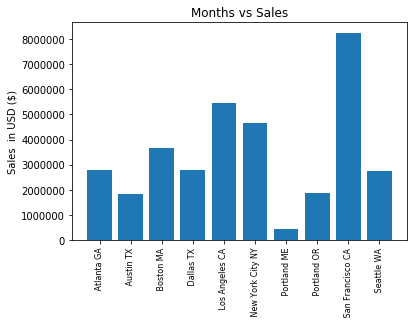

In [38]:
state = [city for city, df in df1.groupby("State")] # since our city number is unordered.
plt.bar(state,results["Sales"])
plt.xticks(state,rotation = "vertical",size = 8)
plt.ylabel("Sales  in USD ($)")
plt.title("Months vs Sales")
plt.show()

### Q2: what US city has the best ammount of Sales?

A2: San Francisco

## Q3: What time is the best time for advertising our products for customers to buy them? 

In [39]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA


In [40]:
# converting a Order Date column into DateTime Object...

df1["Order Date"] = pd.to_datetime(df1["Order Date"])

In [41]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA


As we got converted the Order Date column into Date Time object we now can create a perfect Hour column in the Dataset without doing the string manipulation like we did before.

In [44]:
df1["Hour"] = df1["Order Date"].dt.hour
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA,9


Now we got the information we required so now we can move on and create a comparison 

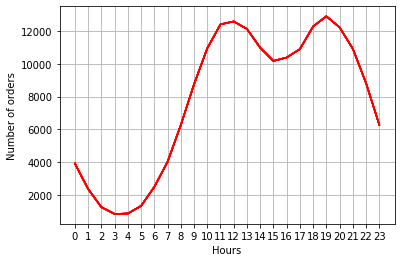

In [58]:
hour = [hour for hour, df in df1.groupby("Hour")]
plt.plot(hour, df1.groupby(["Hour"]).count(),color = "red")
plt.xlabel("Hours")
plt.ylabel("Number of orders")
plt.xticks(hour)
plt.grid()
plt.show()

In [52]:
df1.groupby(["Hour"]).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


The maximum results are coming in the occurances of 11:00 Am and 19:00 Pm

This will answer so many questions on our Advertisement Strategies.

## Q4: What products being sold together the most? 

In [61]:
df1.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA,9
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,San Francisco CA,13
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.99,Seattle,Seattle WA,7
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta,Atlanta GA,10
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco,San Francisco CA,10
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,11.99,Boston,Boston MA,14


In [62]:
df1.tail(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour
186799,259310,Apple Airpods Headphones,1,150.00,2019-09-15 19:08:00,"309 Elm St, Los Angeles, CA 90001",9,150.00,Los Angeles,Los Angeles CA,19
186800,259311,Flatscreen TV,1,300.00,2019-09-18 14:54:00,"930 North St, Seattle, WA 98101",9,300.00,Seattle,Seattle WA,14
186801,259312,Wired Headphones,1,11.99,2019-09-02 19:51:00,"573 Sunset St, San Francisco, CA 94016",9,11.99,San Francisco,San Francisco CA,19
186802,259313,Bose SoundSport Headphones,1,99.99,2019-09-05 11:34:00,"138 2nd St, Los Angeles, CA 90001",9,99.99,Los Angeles,Los Angeles CA,11
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,Atlanta GA,0
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,Atlanta GA,0
186805,259315,Lightning Charging Cable,1,14.95,2019-09-29 16:20:00,"112 5th St, Boston, MA 02215",9,14.95,Boston,Boston MA,16
186806,259316,AAA Batteries (4-pack),1,2.99,2019-09-16 16:48:00,"369 Johnson St, Atlanta, GA 30301",9,2.99,Atlanta,Atlanta GA,16
186807,259317,Lightning Charging Cable,1,14.95,2019-09-26 21:12:00,"151 1st St, New York City, NY 10001",9,14.95,New York City,New York City NY,21
186808,259318,AAA Batteries (4-pack),1,2.99,2019-09-30 10:05:00,"524 Hickory St, Boston, MA 02215",9,2.99,Boston,Boston MA,10


If products are being sold together then will have same order ID.
This is one key point to be noted.

Now we will find the products that are having the same Order ID.

In [64]:
df = df1[df1["Order ID"].duplicated(keep = False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA,14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA,19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,Los Angeles CA,19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,Boston MA,11


In [65]:
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
df.head()

C:\Users\P V S Karthik\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,Boston MA,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [66]:
df2 = df[["Order ID","Grouped"]].drop_duplicates()
df2.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [68]:
df2.shape  # based on this there are 7136 product groups that are ordered together.

(7136, 2)

In [77]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) 
    # we can just gve our number as 3 to get the values regarding 3 products together sold.

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Q4: What products being sold together the most?

These are the most commonly ordered pairs of products.... 
1. ('iPhone', 'Lightning Charging Cable') 1005
2. ('Google Phone', 'USB-C Charging Cable') 987
3. ('iPhone', 'Wired Headphones') 447

## Q5 What Product sold the most and why you think it sold the most?

In [80]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA,9


In [81]:
results = df1.groupby("Product").sum()
results

,Quantity Ordered,Price Each,Month,Sales,Hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


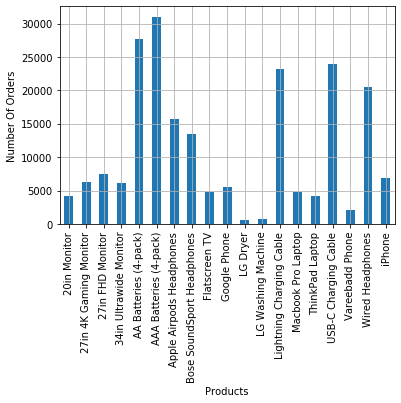

In [85]:

df1.groupby("Product")["Quantity Ordered"].sum().plot.bar()
plt.xlabel("Products")
plt.ylabel("Number Of Orders")
plt.grid()
plt.show()

### Q5 What Product sold the most and why you think it sold the most

A : AAA Batteries (4-pack)